Using the datafile cust_sat.csv attached and available on Blackboard electronic reserves, perform the activities below.  For this assignment, activities are not specifically scripted.  Rather, develop your notebook leveraging the tools and methodologies that we have covered thus far in the course.  Be as thorough as possible to produce an analysis.  There is no single way to do this assignment (not to say there is no wrong answer, but there are many possible approaches that are acceptable).  Explore various approaches as you work through your analysis.  Enjoy the journey and do your best!

Objective:  Develop a model with Logistic Regression that performs a binary classification prediction of the target variable: satisfaction

- Perform EDA (15 pts)

- Perform Data Preparation including dealing with categorical data and missing data, normalization, binning if appropriate, feature reduction or selection strategies if helpful.  Feature engineering can also be attempted if you feel it aids in your analysis.  No specific step is required, but these are the tools in your toolbelt that you can use as a data analyst. (25 pts)

- Make sure to divide data into testing, validation, and training sets. (10 pts)

- Train and test your model. (20 pts)

- Produce effectiveness metrics and results.  Discuss which are most relevant and analyze results.  Does your approach generalize?  Why are the metrics you chose to assess performance relevant? (30 pts)

- Iterate and adjust to improve results.  (10 pts)


Use text cells within the notebook to explain your approach, review analysis and results.  Provide a conclusion at the end of your analysis – what worked, what didn’t?

---
1st part:

Peform EDA

In [ ]:
import pandas as pd

# import csv file to work with
data = pd.read_csv("cust_sat.csv")

# review data and show various data-points
print(data.describe())
print("==========================================================")
data.info()

          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

In [ ]:
# Show any null data
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 1
On-board service                       0
Leg room service                       0
Baggage handling                       1
Checkin service                        0
Inflight service                       0
Cleanliness                            1
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
# address null data by dropping rows with incomplete info
data = data.dropna()

In [ ]:
# convert all data to numerical types
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_num = data

for string in ["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]:
    data_num[f"{string} labeled"] = le.fit_transform(data_num[string])
    data_num = data_num.drop([string], axis=1)
    print(le.classes_) # printing out encoding placement for later



['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


In [ ]:
data_num.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender labeled,Customer Type labeled,Type of Travel labeled,Class labeled,satisfaction labeled
Unnamed: 0,1.000000,0.003147,0.004803,0.003030,-0.002488,0.000791,0.001997,0.005060,-0.001944,0.001166,...,-0.004217,0.000004,-0.000939,-0.000710,-0.000065,0.003975,-0.003007,0.000710,-0.001470,-0.004529
id,0.003147,1.000000,0.022946,0.095212,-0.021345,-0.001732,0.014131,-0.000447,0.001263,0.055407,...,0.079382,0.079469,0.025294,-0.019322,-0.037254,-0.000275,0.000032,0.000557,-0.104356,0.013698
Age,0.004803,0.022946,1.000000,0.099815,0.017460,0.038048,0.024445,-0.001547,0.022940,0.208669,...,0.034974,-0.049900,0.053505,-0.010152,-0.012148,0.008909,-0.281827,-0.048565,-0.117405,0.137018
Flight Distance,0.003030,0.095212,0.099815,1.000000,0.007020,-0.019924,0.065643,0.004713,0.056951,0.215154,...,0.073197,0.057423,0.093114,0.001916,-0.002413,0.006070,-0.225356,-0.267626,-0.427492,0.298886
Inflight wifi service,-0.002488,-0.021345,0.017460,0.007020,1.000000,0.343745,0.715846,0.336111,0.134617,0.456993,...,0.043185,0.110622,0.132632,-0.017446,-0.019087,0.008981,-0.007697,-0.104873,-0.023030,0.284152
Departure/Arrival time convenient,0.000791,-0.001732,0.038048,-0.019924,0.343745,1.000000,0.437018,0.444579,0.005184,0.069979,...,0.093359,0.073221,0.014305,0.000798,-0.000855,0.008871,-0.207000,0.259827,0.089799,-0.051723
Ease of Online booking,0.001997,0.014131,0.024445,0.065643,0.715846,0.437018,1.000000,0.458741,0.031933,0.404070,...,0.010944,0.035321,0.016173,-0.006282,-0.007971,0.007167,-0.019612,-0.133386,-0.094298,0.171480
Gate location,0.005060,-0.000447,-0.001547,0.004713,0.336111,0.444579,0.458741,1.000000,-0.001177,0.001434,...,-0.035421,0.001732,-0.004055,0.005542,0.005155,0.000243,0.006308,-0.030816,-0.004528,0.000445
Food and drink,-0.001944,0.001263,0.022940,0.056951,0.134617,0.005184,0.031933,-0.001177,1.000000,0.234498,...,0.087064,0.034073,0.657670,-0.029975,-0.032518,0.005699,-0.059548,-0.063143,-0.076841,0.209673
Online boarding,0.001166,0.055407,0.208669,0.215154,0.456993,0.069979,0.404070,0.001434,0.234498,1.000000,...,0.204200,0.074384,0.331498,-0.018508,-0.021940,-0.042154,-0.189470,-0.224608,-0.296932,0.503433


<BarContainer object of 2 artists>

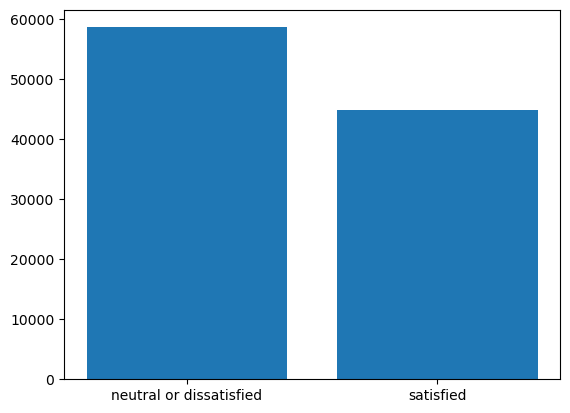

In [ ]:
import matplotlib.pyplot as plt

satisfaction_count = data["satisfaction"].value_counts()

plt.bar(satisfaction_count.index, satisfaction_count)

<Axes: >

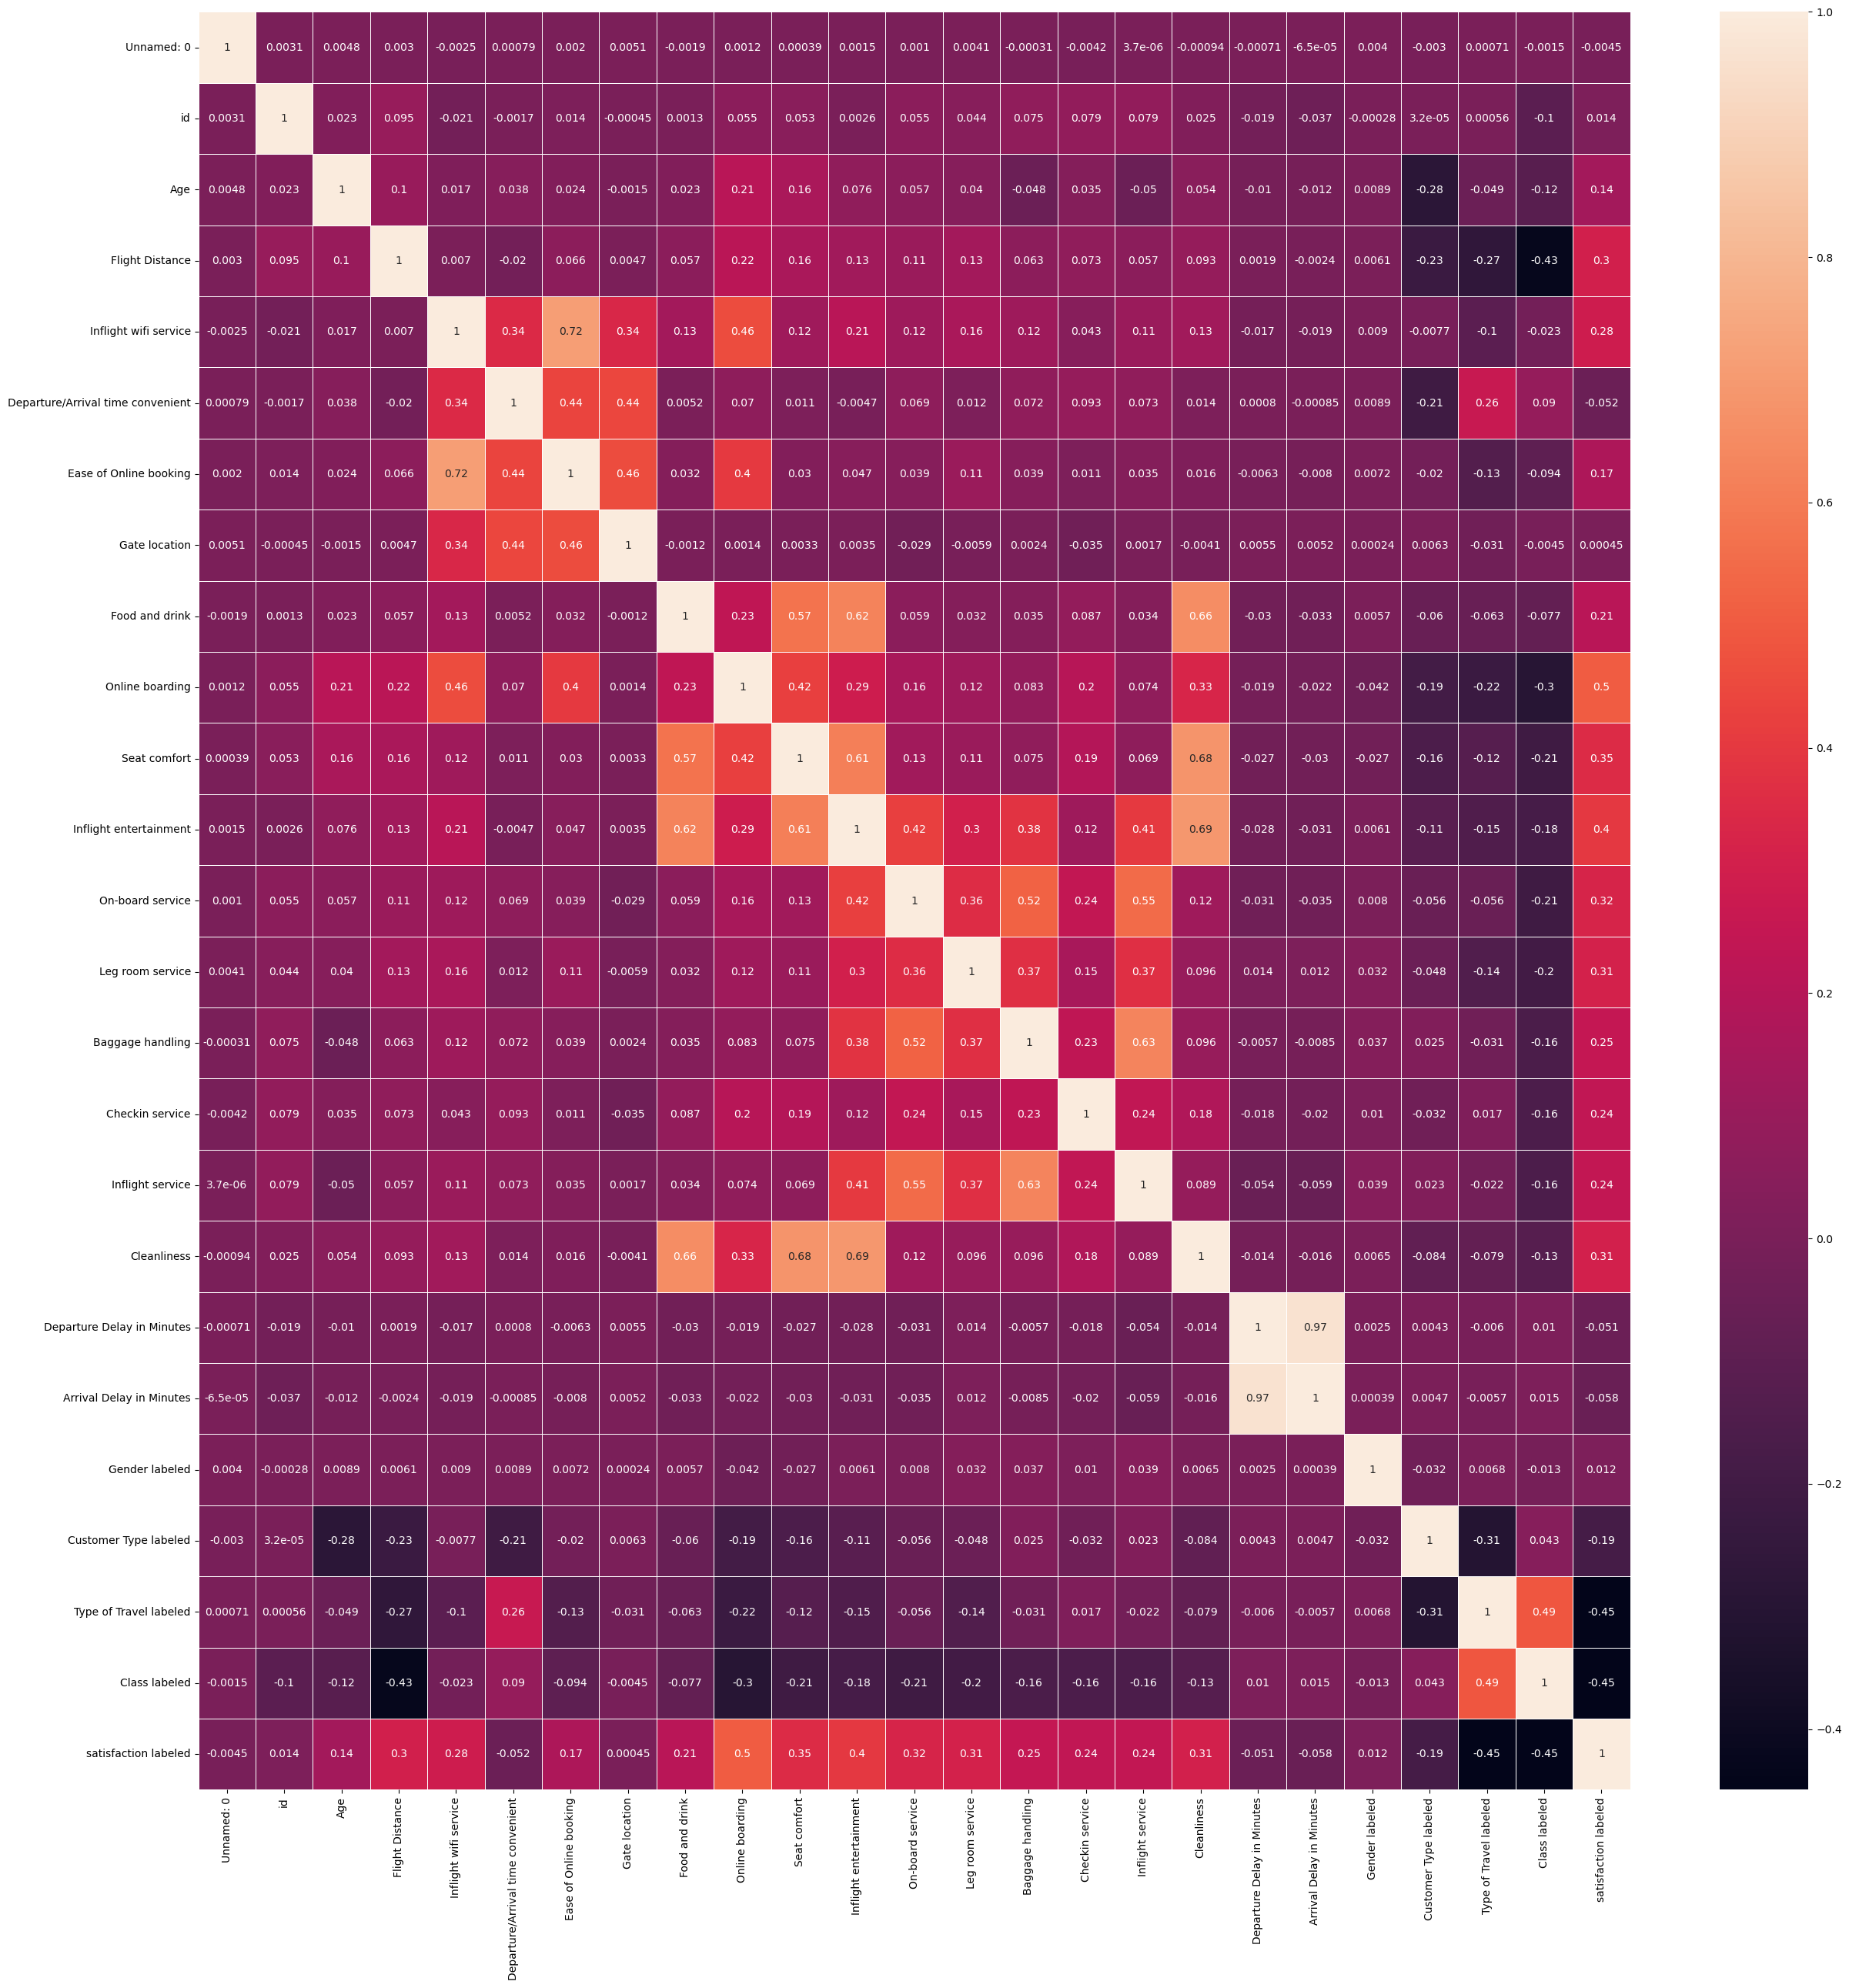

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data_num.corr(), annot=True, linewidths=0.5, ax=ax)

---
2nd part

Perform Data Preparation:
- dealing with categorical data and missing data <- This is done in earlier steps
- normalization <- done
- binning if appropriate <- dont think this is appropriate
- feature reduction or selection strategies if helpful <- done
- Feature engineering can also be attempted if you feel it aids in your analysis.
- - No specific step is required, but these are the tools in your toolbelt that you can use as a data analyst. (25 pts)

In [ ]:
columns_to_drop = ["id", "Gender labeled", "Customer Type labeled", "Age", "Type of Travel labeled",
                   "Inflight wifi service", "Ease of Online booking", "Gate location",
                   "Online boarding"]
data_num_drop = data_num.drop(labels=columns_to_drop, axis=1)

In [ ]:
# splitting up into test and train sets
from sklearn.model_selection import train_test_split

X = data_num_drop.drop("satisfaction labeled", axis=1)
y = data_num["satisfaction labeled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X.head(2)

,Unnamed: 0,Flight Distance,Departure/Arrival time convenient,Food and drink,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class labeled
0,0,460,4,5,5,5.0,4,3,4.0,4,5,5.0,25,18.0,2
1,1,235,2,1,1,1.0,1,5,3.0,1,4,1.0,1,6.0,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction labeled, dtype: int32

<Axes: >

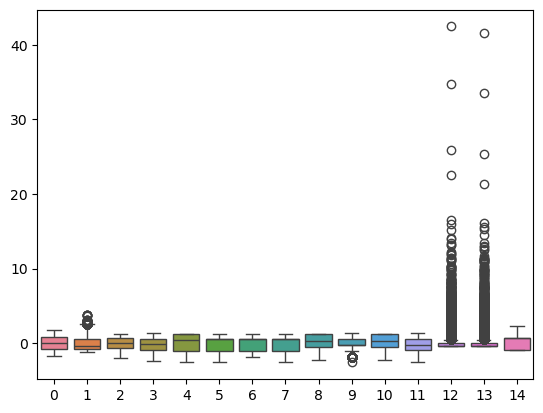

In [ ]:
# Scaling with Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled  = pd.DataFrame(scaler.transform(X_test))

# visualize scaled train data
X.head(2)
sns.boxplot(data=X_test_scaled)

Not sure why this is looking so weird, going to use a different scaler

<Axes: >

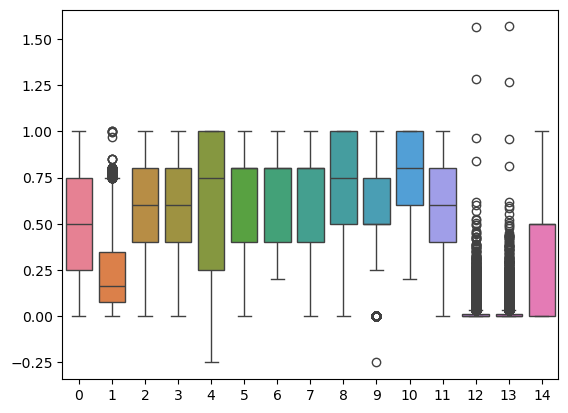

In [ ]:
# using MinMaxScaler instead of Standard Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled  = pd.DataFrame(scaler.transform(X_test))

# visualize scaled train data
sns.boxplot(data=X_test_scaled)

Okay, so it just seems like the data has a lot of outliers. Since most flights are not delayed too long, it is showing that if a flight is delayed even by a small amount, it can be considered an outlier

---
3rd part:

Make sure to divide data into testing, validation, and training sets. (10 pts)

In [ ]:
# Already split into test and training sets earlier.
# now going to split the training set to val and train sets.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42) # passing in the X_train and y_train from earlier

# now there is Training set (64%), Validation set (16%), and Test set (20%)
# Re-scaling training data since it is now smaller

scaler = StandardScaler()

X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled  = pd.DataFrame(scaler.transform(X_test))
X_val_scaled = pd.DataFrame(scaler.transform(X_val))


!!! ERROR IN THE CODE HERE WITH VAIDATION METHOD !!!

- Should not be using train_test_split to make a new validation set.
- Refer to cross validation from week4 notebook
  - use cross_val_score(model, X_Train_scaled, y_train, cv=5, scoring="roc_auc")
  - Using training model folds again on model that was trained on the whole training data set.

---
4th part:

Train and test your model. (20 pts)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_test_pred = model.predict(X_test_scaled)
y_val_pred = model.predict(X_val_scaled)

---
5th part:

Produce effectiveness metrics and results.  Discuss which are most relevant and analyze results.  Does your approach generalize?  Why are the metrics you chose to assess performance relevant? (30 pts)

In [ ]:
# making a confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
conf_matrix_val = confusion_matrix(y_val, y_val_pred, labels=[0, 1])

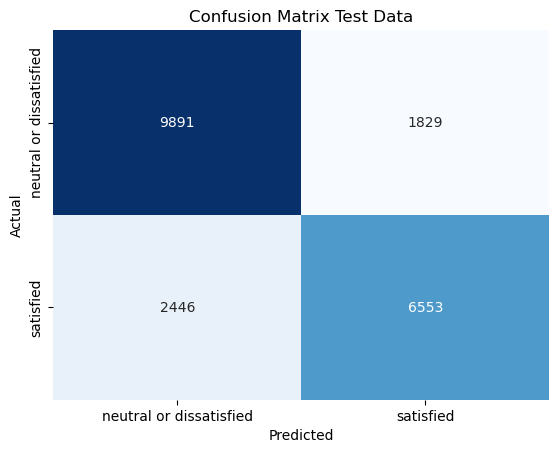

In [ ]:
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=['neutral or dissatisfied', 'satisfied'],
           yticklabels=['neutral or dissatisfied', 'satisfied'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Test Data")
plt.show()

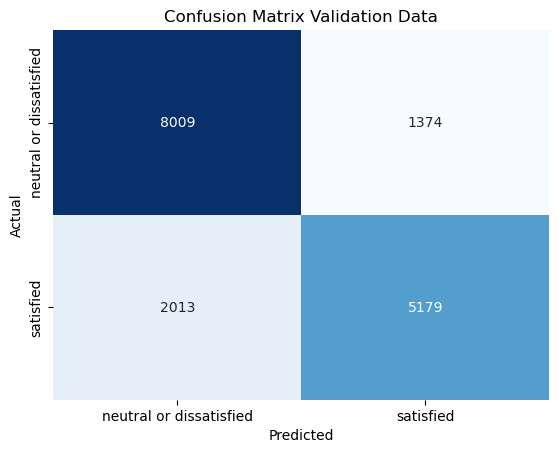

In [ ]:
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=['neutral or dissatisfied', 'satisfied'],
           yticklabels=['neutral or dissatisfied', 'satisfied'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Validation Data")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# reference for what 0 and 1 are: ['neutral or dissatisfied', 'satisfied']

print("\t\t===== TEST DATA =====\n", classification_report(y_test, y_test_pred, labels=[0,1]))
print("\t\t===== VAL DATA =====\n", classification_report(y_val, y_val_pred, labels=[0,1]))

		===== TEST DATA =====
               precision    recall  f1-score   support

           0       0.80      0.84      0.82     11720
           1       0.78      0.73      0.75      8999

    accuracy                           0.79     20719
   macro avg       0.79      0.79      0.79     20719
weighted avg       0.79      0.79      0.79     20719

		===== VAL DATA =====
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      9383
           1       0.79      0.72      0.75      7192

    accuracy                           0.80     16575
   macro avg       0.79      0.79      0.79     16575
weighted avg       0.80      0.80      0.79     16575



In [ ]:
# accuracy scores
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_test_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Validation accuracy: {val_acc}")
print(f"Test accuracy: {test_acc}")

Validation accuracy: 0.7956561085972851
Test accuracy: 0.7936676480525122


C:\Users\ppark\.conda\envs\SEAS6414_py3-10-14\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\ppark\.conda\envs\SEAS6414_py3-10-14\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


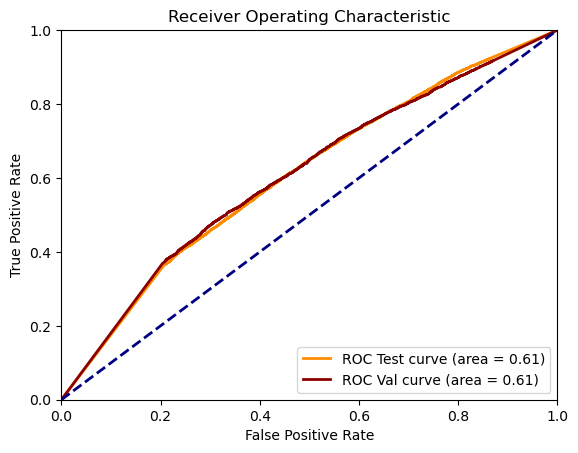

In [ ]:
# making ROC (reciever operating characteristic) curve and AUC (area under curve)
from sklearn.metrics import roc_curve, auc

y_test_pred_prob = model.predict_proba(X_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

y_val_pred_prob = model.predict_proba(X_val)[:,1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC Test curve (area = {roc_auc_test:0.2f})')
plt.plot(fpr_val, tpr_val, color='darkred', lw=2, label=f'ROC Val curve (area = {roc_auc_val:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# print out LogisticRegression model summary
import statsmodels.api as sm

model_sm = sm.Logit(y_train, X_train)
result = model_sm.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.503959
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     satisfaction labeled   No. Observations:                66297
Model:                            Logit   Df Residuals:                    66282
Method:                             MLE   Df Model:                           14
Date:                  Thu, 05 Sep 2024   Pseudo R-squ.:                  0.2634
Time:                          11:38:15   Log-Likelihood:                -33411.
converged:                         True   LL-Null:                       -45356.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Unnamed: 0                        -6.657e-06  

===Discuss which are most relevant and analyze results. Does your approach generalize? Why are the metrics you chose to assess performance relevant?===

From review of the ROC curve and the z-scores from the summary, it seems that I may have picked the wrong data to relate with the dependent variable. This model seems to be accurate with a score of almost 80%, but it does not perform well. The AUC for the ROC can be seen that it is very close to random. It does not seem to approach generalization since the score is very close to being just random.

When I picked what features to remove and keep, it was based primarily on my own personal assumptions on what would affect the satisfaction score or not. Seems like some of the items I chose were fine, but some of them were not correlated, so much so that their Z-score is a bit lower than the others, indicating the null hypothesis for those features to be most likely true. I will have to review the correlation matrix and this z-score to determine what datapoints to use in the next test.

Another possible point of error could be that I did not stratify the data when splitting it.

The metrics I chose to assess performance of the model were the ROC, AUC, pseudo R-squared value, and the coefficents. The ROC displays a curve that visualizes the trade-offs between true positive and false positive rates. The AUC ties directly to the ROC, as it allows for easy comparison between different models, where a higher AUC is generally desired. The Pseudo R-Squared value is something I interpreted similar to the regular R-squared value where a lower value means no relationship and high value means relationship. With a value of 0.26, it seems like the model is veering towards not having a good relationship. The coefficents shows how much the dependent variable ties in with each feature.

---
6th part

Iterate and adjust to improve results.  (10 pts)


In [ ]:
# To begin adjusting results, I will first pick out new features
# I will keep any feature that is above an absolute value of 0.25 in the correlation matrix.
# For items that are close to 0.25, I will keep them if they are directly related to interacting with a service representative

columns_to_drop = ["id", "Age", "Departure/Arrival time convenient", "Ease of Online booking",
                   "Gate location", "Food and drink", "Departure Delay in Minutes",
                   "Arrival Delay in Minutes", "Gender labeled", "Customer Type labeled"]
# previous removed items:
#    columns_to_drop = ["id", "Gender labeled", "Customer Type labeled", "Age", "Type of Travel labeled",
#                       "Inflight wifi service", "Ease of Online booking", "Gate location",
#                       "Online boarding"]

X = data_num.drop(columns_to_drop, axis=1)
X = X.drop(["satisfaction labeled", X.columns[0]], axis=1)
y = data_num["satisfaction labeled"]

# grabbing this information from earlier to note what 0 and 1 are in "satisfaction labeled"
# ['neutral or dissatisfied' 'satisfied']

In [ ]:
X.head()

,Flight Distance,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Type of Travel labeled,Class labeled
0,460,3,3,5,5.0,4,3,4.0,4,5,5.0,1,2
1,235,3,3,1,1.0,1,5,3.0,1,4,1.0,0,0
2,1142,2,5,5,5.0,4,3,4.0,4,4,5.0,0,0
3,562,2,2,2,2.0,2,5,3.0,1,4,2.0,0,0
4,214,3,5,5,3.0,3,4,4.0,3,3,3.0,0,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction labeled, dtype: int32

<Axes: >

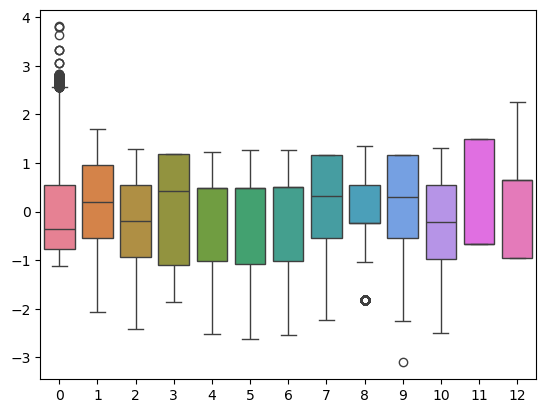

In [ ]:
# split into test, train, and val sets
# setting up STRATIFICATION to be "y"

# As before, the Training set (64%), Validation set (16%), and Test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state=42, stratify=y_temp)

# Scaling data
scaler = StandardScaler()

X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled  = pd.DataFrame(scaler.transform(X_test))
X_val_scaled = pd.DataFrame(scaler.transform(X_val))

# Plotting Scaled data
sns.boxplot(data=X_test_scaled)

Seems like removing the features that talk about any timing info helps make the data look better. Although, it looks like there is a lot of outliers in the flight distance. Since that only had a correlation score of 0.3 and in the previous test, it had a Z-score of around 4, I will remove it so it doesnt mess with the other data

In [ ]:
# dropping Flight Distance
X = X.drop("Flight Distance", axis=1)

# redoing steps from earlier to keep everything consistent
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state=42, stratify=y_temp)

# Scaling data
X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled  = pd.DataFrame(scaler.transform(X_test))
X_val_scaled = pd.DataFrame(scaler.transform(X_val))

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_val_scaled.shape)

(66297, 12)
(20719, 12)
(16575, 12)


In [ ]:
# train, test, and validate model

model_1 = LogisticRegression()
model_1.fit(X_train_scaled, y_train)

y_test_pred = model_1.predict(X_test_scaled)
y_val_pred = model_1.predict(X_val_scaled)

In [ ]:
# Make a confusion matrix

conf_matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
conf_matrix_val = confusion_matrix(y_val, y_val_pred, labels=[0, 1])

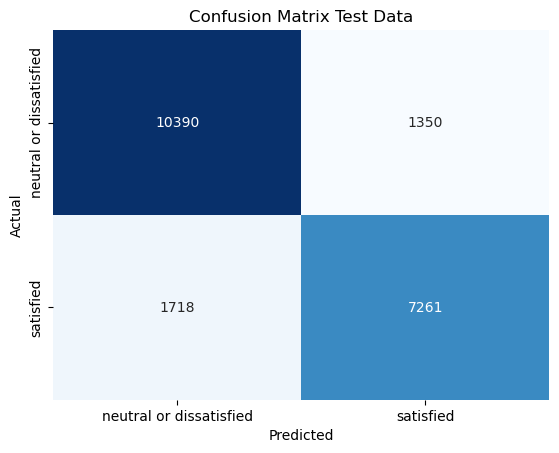

In [ ]:
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=['neutral or dissatisfied', 'satisfied'],
           yticklabels=['neutral or dissatisfied', 'satisfied'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Test Data")
plt.show()

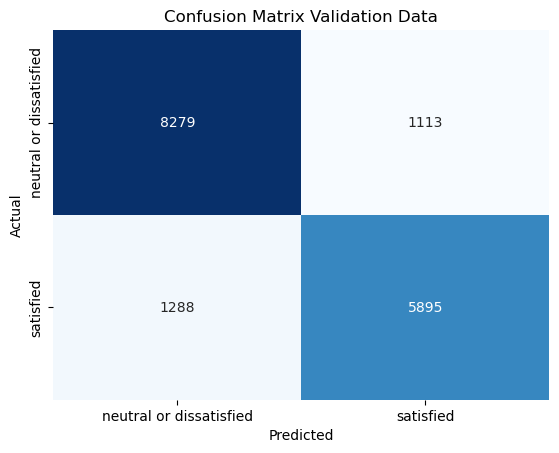

In [ ]:
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=['neutral or dissatisfied', 'satisfied'],
           yticklabels=['neutral or dissatisfied', 'satisfied'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Validation Data")
plt.show()

In [ ]:
# print out the classificaition report to show how the model is performing

# reference for what 0 and 1 are: ['neutral or dissatisfied', 'satisfied']

print("\t\t===== TEST DATA =====\n", classification_report(y_test, y_test_pred, labels=[0,1]))
print("\t\t===== VAL DATA =====\n", classification_report(y_val, y_val_pred, labels=[0,1]))

		===== TEST DATA =====
               precision    recall  f1-score   support

           0       0.86      0.89      0.87     11740
           1       0.84      0.81      0.83      8979

    accuracy                           0.85     20719
   macro avg       0.85      0.85      0.85     20719
weighted avg       0.85      0.85      0.85     20719

		===== VAL DATA =====
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      9392
           1       0.84      0.82      0.83      7183

    accuracy                           0.86     16575
   macro avg       0.85      0.85      0.85     16575
weighted avg       0.85      0.86      0.85     16575



In [ ]:
# print out accuracy scores

test_acc = accuracy_score(y_test, y_test_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Validation accuracy: {100*val_acc:.3f}%")
print(f"Test accuracy: {100*test_acc:.3f}%")

Validation accuracy: 85.514%
Test accuracy: 85.192%


C:\Users\ppark\.conda\envs\SEAS6414_py3-10-14\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\ppark\.conda\envs\SEAS6414_py3-10-14\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


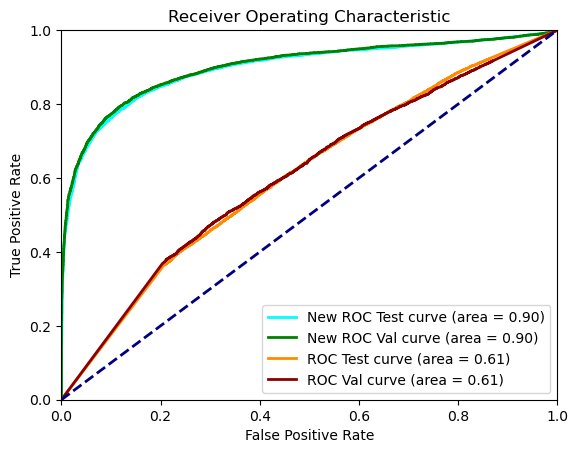

In [ ]:
# Making the ROC curve. Note that all variables have the "_1" so that the previous model can be plotted with this one

y_test_pred_prob_1 = model_1.predict_proba(X_test)[:,1]
fpr_test_1, tpr_test_1, thresholds_test_1 = roc_curve(y_test, y_test_pred_prob_1)
roc_auc_test_1 = auc(fpr_test_1, tpr_test_1)

y_val_pred_prob_1 = model_1.predict_proba(X_val)[:,1]
fpr_val_1, tpr_val_1, thresholds_val_1 = roc_curve(y_val, y_val_pred_prob_1)
roc_auc_val_1 = auc(fpr_val_1, tpr_val_1)

plt.figure()
#this is plotting info for new model
plt.plot(fpr_test_1, tpr_test_1, color='cyan', lw=2, label=f'New ROC Test curve (area = {roc_auc_test_1:0.2f})')
plt.plot(fpr_val_1, tpr_val_1, color='green', lw=2, label=f'New ROC Val curve (area = {roc_auc_val_1:0.2f})')

#plotting bit for old model
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC Test curve (area = {roc_auc_test:0.2f})')
plt.plot(fpr_val, tpr_val, color='darkred', lw=2, label=f'ROC Val curve (area = {roc_auc_val:0.2f})')

#plotting specifics
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_sm_1 = sm.Logit(y_train, X_train)
result_1 = model_sm_1.fit()
print(result_1.summary())

Optimization terminated successfully.
         Current function value: 0.455190
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     satisfaction labeled   No. Observations:                66297
Model:                            Logit   Df Residuals:                    66285
Method:                             MLE   Df Model:                           11
Date:                  Thu, 05 Sep 2024   Pseudo R-squ.:                  0.3348
Time:                          15:21:36   Log-Likelihood:                -30178.
converged:                         True   LL-Null:                       -45364.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Inflight wifi service      0.0565      0.009      6.403      0.000  

This model is much better than the last, but it seems like there are still some features that could be removed and possibly improve the model:
- Inflight wifi service
- Leg room service
- Checkin service

In [ ]:
# dropping those three items
columns_to_drop = ["Inflight wifi service", "Leg room service", "Checkin service"]
X = X.drop(columns_to_drop, axis=1)

# redoing steps from earlier to keep everything consistent
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state=42, stratify=y_temp)

# Scaling data
scaler = StandardScaler()
X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled  = pd.DataFrame(scaler.transform(X_test))
X_val_scaled = pd.DataFrame(scaler.transform(X_val))

In [ ]:
# train, test, and validate model

model_2 = LogisticRegression()
model_2.fit(X_train_scaled, y_train)

y_test_pred = model_2.predict(X_test_scaled)
y_val_pred = model_2.predict(X_val_scaled)

In [ ]:
test_acc = accuracy_score(y_test, y_test_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Validation accuracy: {100*val_acc:.3f}%")
print(f"Test accuracy: {100*test_acc:.3f}%")

Validation accuracy: 85.014%
Test accuracy: 84.801%


Looks like accuracy score went down very slightly. Seems like removing them did not help

C:\Users\ppark\.conda\envs\SEAS6414_py3-10-14\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\ppark\.conda\envs\SEAS6414_py3-10-14\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


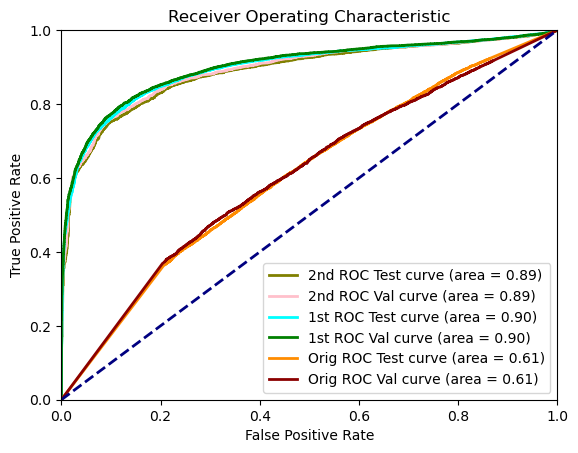

In [ ]:
# Making the ROC curve. Note that all variables have the "_2" so that the previous models can be plotted with this one

y_test_pred_prob_2 = model_2.predict_proba(X_test)[:,1]
fpr_test_2, tpr_test_2, thresholds_test_2 = roc_curve(y_test, y_test_pred_prob_2)
roc_auc_test_2 = auc(fpr_test_2, tpr_test_2)

y_val_pred_prob_2 = model_2.predict_proba(X_val)[:,1]
fpr_val_2, tpr_val_2, thresholds_val_2 = roc_curve(y_val, y_val_pred_prob_2)
roc_auc_val_2 = auc(fpr_val_2, tpr_val_2)

plt.figure()
# plotting for 2nd iter model
plt.plot(fpr_test_2, tpr_test_2, color='olive', lw=2, label=f'2nd ROC Test curve (area = {roc_auc_test_2:0.2f})')
plt.plot(fpr_val_2, tpr_val_2, color='pink', lw=2, label=f'2nd ROC Val curve (area = {roc_auc_val_2:0.2f})')

# plotting 1st iter model
plt.plot(fpr_test_1, tpr_test_1, color='cyan', lw=2, label=f'1st ROC Test curve (area = {roc_auc_test_1:0.2f})')
plt.plot(fpr_val_1, tpr_val_1, color='green', lw=2, label=f'1st ROC Val curve (area = {roc_auc_val_1:0.2f})')

# plotting for original model
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Orig ROC Test curve (area = {roc_auc_test:0.2f})')
plt.plot(fpr_val, tpr_val, color='darkred', lw=2, label=f'Orig ROC Val curve (area = {roc_auc_val:0.2f})')

#plotting specifics
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_sm_2 = sm.Logit(y_train, X_train)
result_2 = model_sm_2.fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.455676
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     satisfaction labeled   No. Observations:                66297
Model:                            Logit   Df Residuals:                    66288
Method:                             MLE   Df Model:                            8
Date:                  Thu, 05 Sep 2024   Pseudo R-squ.:                  0.3341
Time:                          15:25:37   Log-Likelihood:                -30210.
converged:                         True   LL-Null:                       -45364.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Online boarding            0.4815      0.009     54.630      0.000  

In [ ]:
print(result_1.summary())

                            Logit Regression Results                            
Dep. Variable:     satisfaction labeled   No. Observations:                66297
Model:                            Logit   Df Residuals:                    66285
Method:                             MLE   Df Model:                           11
Date:                  Thu, 05 Sep 2024   Pseudo R-squ.:                  0.3348
Time:                          15:25:44   Log-Likelihood:                -30178.
converged:                         True   LL-Null:                       -45364.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Inflight wifi service      0.0565      0.009      6.403      0.000       0.039       0.074
Online boarding            0.4447      0.010     44.216      0.000       0.425 

In [ ]:
print(result.summary())

                            Logit Regression Results                            
Dep. Variable:     satisfaction labeled   No. Observations:                66297
Model:                            Logit   Df Residuals:                    66282
Method:                             MLE   Df Model:                           14
Date:                  Thu, 05 Sep 2024   Pseudo R-squ.:                  0.2634
Time:                          15:25:49   Log-Likelihood:                -33411.
converged:                         True   LL-Null:                       -45356.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Unnamed: 0                        -6.657e-06   3.05e-07    -21.802      0.000   -7.25e-06   -6.06e-06
Flight Distance                     4.34e-05  

It seems that the 1st iteration is the closest I can get with the accuracy and ROC score. Next time, I think the best approach would be to try and leverage the pd.df.corr() matrix and the scaled data more. When I first started, it was through assumptions on what I thought would dictate satisfaction levels. Using this approach is much more correct and leads to better results